## Exploratory Data Analysis (EDA)

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Create dataframe to read dataset
df = pd.read_csv("hr_employee_churn_data.csv")
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [79]:
# df['salary'] = df['salary'].astype(str)

In [80]:
# df['salary']

In [81]:
df.shape

(14999, 10)

In [82]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [83]:
df['Work_accident'].unique()

array([0, 1])

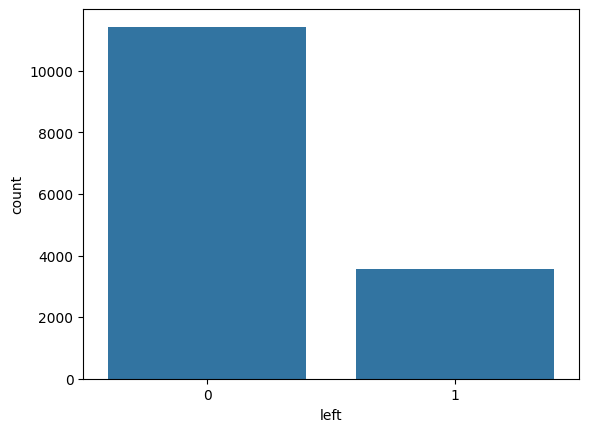

In [84]:
sns.countplot(x='left',data=df)
plt.show()

In [85]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

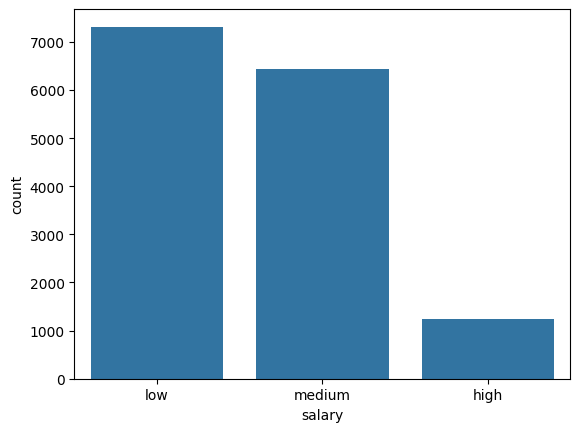

In [86]:
sns.countplot(x='salary', data=df)

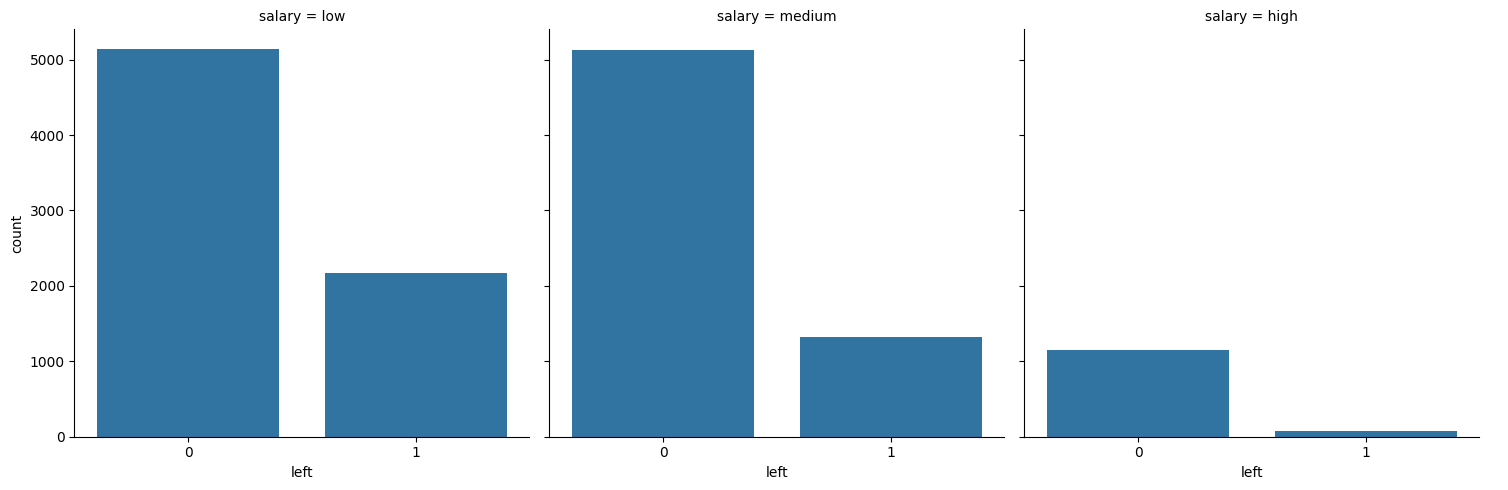

In [87]:
# feature 'Left' split over the feature 'salary'
sns.catplot(x='left', col='salary', kind='count', data=df)

<Axes: xlabel='promotion_last_5years', ylabel='count'>

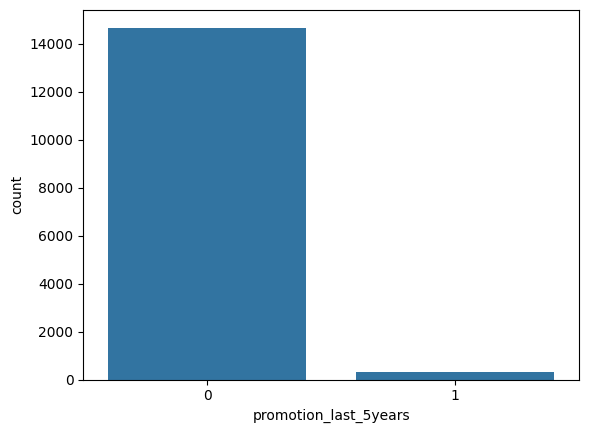

In [88]:
sns.countplot(x='promotion_last_5years', data=df)

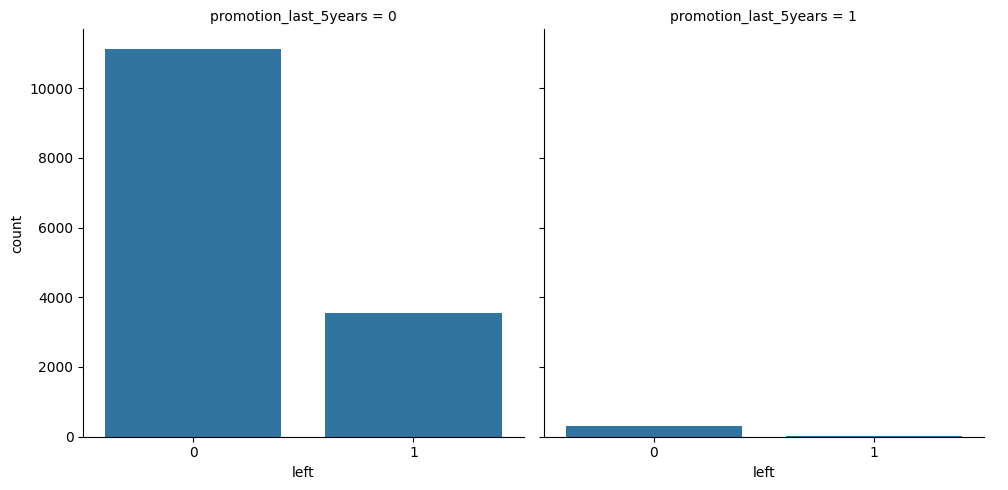

In [89]:
sns.catplot(x='left', col='promotion_last_5years', kind='count', data=df)

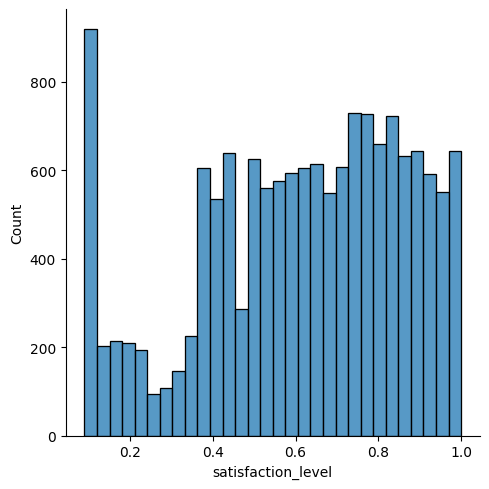

In [90]:
sns.displot(df['satisfaction_level']);

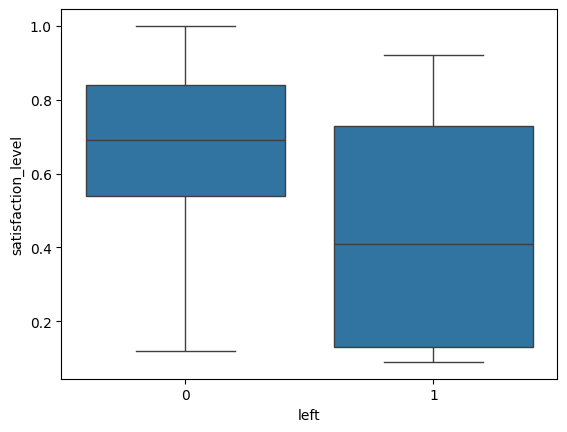

In [91]:
sns.boxplot(x="left", y="satisfaction_level", data=df);

In [92]:
# cor_mat = df.corr()
# fig = plt.figure(figsize=(15,7))
# sns.heatmap(df, annot=True)

## Feature Engineering

In [93]:
df2 = df.copy()

In [94]:
df2.drop(['empid'], axis=1, inplace=True)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [95]:
df2.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [96]:
df2['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [97]:
df2['satisfaction_level'] = df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean())

In [98]:
df2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [99]:
df2['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [106]:
salary_dummies = pd.get_dummies(df2['salary'], drop_first=True).astype(int)

In [107]:
salary_dummies

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [108]:
df2 = pd.concat([df2, salary_dummies], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary                 14999 non-null  object 
 8   left                   14999 non-null  int64  
 9   low                    14999 non-null  int64  
 10  medium                 14999 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 1.3+ MB


In [109]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,1,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,1
2,0.11,0.88,7,272,4,0,0,medium,1,0,1
3,0.72,0.87,5,223,5,0,0,low,1,1,0
4,0.37,0.52,2,159,3,0,0,low,1,1,0


In [110]:
# drop salary column
df2.drop(['salary'], axis=1, inplace=True)

In [111]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


## Split Dataset into Training set and Test set

In [112]:
X = df2.drop(labels='left', axis=1)
y = df2['left']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [114]:
len(X_train), len(X_test)

(11999, 3000)

In [116]:
len(y_train), len(y_test)

(11999, 3000)

## Model Selection

In [117]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [118]:
# Create param

model_param = {
    'RandomForestClassifier': {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [10,50,100,130],
            'criterion' : ['gini', 'entropy'],
            'max_depth' : range(2,4,1),
            'max_features' : ['auto', 'log2']
        }
    },
    'XGBClassifier' : {
        'model' : XGBClassifier(objective='binary:logistic'),
        'param' : {
            'learning_rate' : [0.5, 0.1, 0.01, 0.001],
            'max_depth' : [3,5,10,20],
            'n_estimators' : [10, 50, 100, 200]
        }
    }
}

In [119]:
score = []
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'], param_grid=mp['param'], cv=5, return_train_score=False)
    model_selection.fit(X,y)
    score.append({
        'model' : model_name,
        'best_score' : model_selection.best_score_,
        'best_params' : model_selection.best_params_
    })

/Users/bcb/Documents/07-working-files/12-ml-endtoend-1/venv-ml-endtoend-1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bcb/Documents/07-working-files/12-ml-endtoend-1/venv-ml-endtoend-1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bcb/Documents/07-working-files/12-ml-endtoend-1/venv-ml-endtoend-1/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  Fil

In [120]:
score

[{'model': 'RandomForestClassifier',
  'best_score': 0.9223297765921974,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9909995109480938,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}}]

## Model Building

In [121]:
model_xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.1, max_depth=20, n_estimators=200)

In [122]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [123]:
model_xgb.score(X_test, y_test)

0.9916666666666667

In [124]:
model_xgb.predict(X_test[:1])

array([0])

In [125]:
X_test[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
11908,0.67,0.39,2,207,7,0,0,0,1


In [127]:
df.loc[11908]['left']

0

In [130]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test) )
cm

array([[2280,    7],
       [  18,  695]])

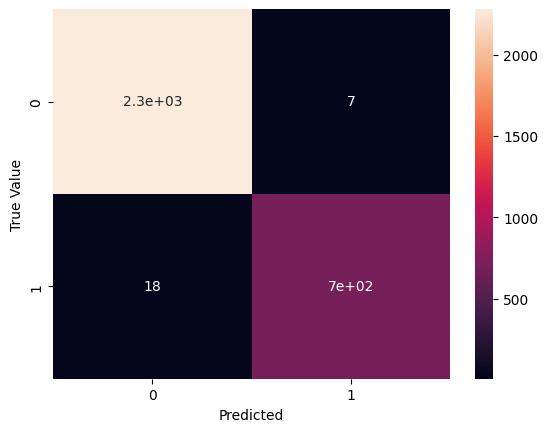

In [131]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()